# Importing necessary libraries and Data

In [1]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
API_KEY = "e14d58039c8d793a29d65cdaad1ab183044a748e"
BASE_URL = "https://api.census.gov/data/2023/acs/acs5"

variable_map = {
    "B01003_001E": "total_population",
    "B02001_002E": "white_alone",
    "B02001_003E": "black_alone",
    "B03003_003E": "hispanic_latino",
    "B19013_001E": "median_household_income",
    "B19301_001E": "per_capita_income",
    "B25064_001E": "median_rent",
    "B25077_001E": "median_home_value",
    "B15003_010E": "6th grade",
    "B15003_013E": "9th grade",
    "B15003_014E": "10th grade",
    "B23025_003E": "civilian_labor_force",
    "B23025_004E": "employed",
    "B23025_005E": "unemployed"
}
params = {
    "get": ",".join(variable_map),
    "for": "tract:*",
    "in": "state:34 county:017",
    "key": API_KEY
}
response = requests.get(BASE_URL, params=params)
data = response.json()
Original = pd.DataFrame(data[1:], columns=data[0])
Original = Original.rename(columns=variable_map)

Original

,total_population,white_alone,black_alone,hispanic_latino,median_household_income,per_capita_income,median_rent,median_home_value,6th grade,9th grade,10th grade,civilian_labor_force,employed,unemployed,state,county,tract
0,2728,674,187,1371,119375,45676,2129,516600,0,0,0,1706,1641,65,34,017,000101
1,3330,962,605,1096,85353,36632,2021,576400,0,0,9,1756,1654,102,34,017,000102
2,4336,1527,243,2780,45280,29307,1356,512100,204,14,0,2098,1954,144,34,017,000200
3,3975,2248,125,1490,109500,62624,1662,817800,101,40,11,2636,2439,197,34,017,000300
4,3543,548,142,1115,92250,42340,1703,534000,38,26,146,1789,1672,117,34,017,000400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,5194,1859,211,1590,100750,60407,1751,461400,28,0,58,2832,2616,216,34,017,019900
179,5247,2593,415,1110,128633,48913,1582,592700,26,69,56,2650,2406,244,34,017,020000
180,3676,601,654,442,200333,86723,2906,436200,0,0,0,2395,2254,141,34,017,020100
181,6727,2675,34,6097,32642,22279,1467,455600,249,64,150,3399,2921,478,34,017,032400


In [3]:
API_KEY = "e14d58039c8d793a29d65cdaad1ab183044a748e"
BASE_URL = "https://api.census.gov/data/2023/acs/acs5"

variable_map = {
    "B02001_005E" : "asian_alone",
    "B19301A_001E" : "per_capita_income_white_alone",
    "B19301B_001E" : "per_capita_income_black_alone",
    "B19301I_001E" : "per_capita_income_hispanic_latino",
    "B25065_001E" : "aggregate_gross_rent",
    "B19313A_001E" : "aggregate_income_white_alone_15plus",
    "B19313B_001E" : "aggregate_income_black_alone_15plus",
    "B19313I_001E" : "aggregate_income_hispanic_latino_15plus",
    "B25077A_001E" : "median_home_value_white_alone_householder",
    "B25077B_001E" : "median_home_value_black_alone_householder",
    "B25077I_001E" : "median_home_value_hispanic_latino_householder",
    "B15003_017E" : "educational_attainment_25plus",
    "B15003_018E" : "high_school_graduate_25plus",
    "B15001_006E" : "male high school graduate 18-24",
    "B15001_007E" : "male some college no degree 18-24",
    "B15001_008E" : "male associate's degree 18-24",
    "B15001_047E" : "female high school graduate 18-24",
    "B15001_048E" : "female some college no degree 18-24",
    "B15001_049E" : "female associate's degree 18-24",
    "B26106_003E" : "High school graduate group 3",
    "B26106_004E" : "Some college or associate's degree group 3",
    "B26106_005E" : "Bachelor's degree or higher group 3",
    "B29003_001E" : "Total Poverty",
    "B29003_002E" : "Total Income in the past 12 months below poverty level",
    "B29003_003E" : "Total Income in the past 12 months at or above the poverty level", 
    "B15001_002E" : "sex_age_educational_attainment_18_Male",
    "B15001_043E" : "sex_age_educational_attainment_18_Female",
    "B08128_001E" : "means_transportation_to_work_class_worker"
}
params = {
    "get": ",".join(variable_map),
    "for": "tract:*",
    "in": "state:34 county:017",
    "key": API_KEY
}
response = requests.get(BASE_URL, params=params)
data = response.json()
Extra = pd.DataFrame(data[1:], columns=data[0])
Extra = Extra.rename(columns=variable_map)

Extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 31 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   asian_alone                                                       183 non-null    object
 1   per_capita_income_white_alone                                     182 non-null    object
 2   per_capita_income_black_alone                                     162 non-null    object
 3   per_capita_income_hispanic_latino                                 182 non-null    object
 4   aggregate_gross_rent                                              182 non-null    object
 5   aggregate_income_white_alone_15plus                               182 non-null    object
 6   aggregate_income_black_alone_15plus                               162 non-null    object
 7   aggregate_income_hispanic_latino_15plus     

# Constant and Functions

In [4]:

tracts = gpd.read_file("tract/tl_2023_34_tract.shp") # read in (tract) shape file

# miles to meters
miles = 1
meters = miles * 1609.344

In [5]:
NJCU_Main_Campus = ("NJCU Main Campus", (40.70965701019521, -74.08762453425862))
NJCU_Fort_Monmouth = ("Fort Monmouth", (40.31580426081605, -74.0449999353578))
NJCU_Business = ("NJCU Business School", (40.71868, -74.03387))

In [6]:
def get_geoid(campus_info):
    campus_name, (lat, lon) = campus_info
    center_point = Point(lon, lat)
    center_point_m = gpd.GeoSeries([center_point], crs="EPSG:4326").to_crs(epsg=3395).iloc[0]

    tracts_m = tracts.to_crs(epsg=3395)
    buffer = center_point_m.buffer(meters)

    tracts_near = tracts_m[
        tracts_m.intersects(buffer) &
        tracts_m.geometry.type.isin(["Polygon", "MultiPolygon"])
    ].copy()

    tracts_near = tracts_near.to_crs(epsg=4326)
    geo_info = tracts_near[["GEOID", "geometry"]].copy()
    
    return geo_info

In [7]:
def tract_map(campus_info):
    campus_name, (lat, lon) = campus_info
    
    geo_info = get_geoid(campus_info)

    m = folium.Map(location=[lat, lon], zoom_start=15)

    folium.GeoJson(geo_info).add_to(m)

    folium.CircleMarker(
        location=[lat, lon],
        radius=10,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.7,
        popup=campus_name
    ).add_to(m)

    folium.Circle(
        location=[lat, lon],
        radius=meters,
        color="black",
        weight=1,
        fill_opacity=0.3,
        opacity=1,
        fill_color="green",
        fill=False,
        popup=f"{miles} mile radius",
    ).add_to(m)

    return m

In [8]:
def get_tract(campus_info):
    temp = get_geoid(campus_info)
    temp["tract"] = temp["GEOID"].astype(str).str[-6:].str.zfill(6)
    return temp[["tract", "GEOID", "geometry"]]


In [9]:
#Change everything into int or float dtypes
def clean_df(df):
    df_numeric = df.apply(pd.to_numeric, errors='coerce')
    exclude_cols = ['tract', 'geometry'] #doesnt touch this column
    for col in df.columns:
        if col in exclude_cols:
            df[col] = df[col]
        else:
            valid_mask = (df_numeric[col] != -666666666) & (~df_numeric[col].isna())
            col_mean = df_numeric.loc[valid_mask, col].mean()
            cleaned_col = df_numeric[col].replace(-666666666, pd.NA).fillna(col_mean)
            df[col] = cleaned_col
    return df

# Cleaning Data

In [10]:
Main_Campus = get_tract(NJCU_Main_Campus).reset_index(drop="True")
Business = get_tract(NJCU_Business).reset_index(drop="True")
Fort_Monmouth = get_tract(NJCU_Fort_Monmouth).reset_index(drop="True")
NJCU_Tract = pd.concat([Main_Campus, Business, Fort_Monmouth], axis=0).reset_index(drop=True)

In [11]:
Original = Original.merge(NJCU_Tract, left_on="tract", right_on="tract", how="inner")
Extra = Extra.merge(NJCU_Tract, left_on="tract", right_on="tract", how="inner")

In [12]:
# Extra = Extra.drop(columns =["median_home_value_white_alone_householder", "median_home_value_black_alone_householder", "median_home_value_hispanic_latino_householder"])

We are dropping anything related to median home value due to insufficient data. The data was missing for 21.5% of Whites, 69.9% of Blacks, and 44.1% of Hispanics. Additionally, we deemed this variable not important to our analysis.

In [13]:
Extra = Extra.drop(columns =["aggregate_gross_rent", "aggregate_income_white_alone_15plus", "aggregate_income_black_alone_15plus", "aggregate_income_hispanic_latino_15plus"])

We deemed aggregated data to be irrelevant, as it is hard to process and separate individuals.

In [14]:
Extra = Extra.drop(columns =["High school graduate group 3", "Some college or associate's degree group 3", "Bachelor's degree or higher group 3"])

There was no data at all regarding some college or bachelor-related education. We decided to just drop both.

In [15]:
Original_Clean = clean_df(Original)
Extra_Clean = clean_df(Extra)
Data = pd.merge(Original_Clean, Extra_Clean, on=["tract","state","county", "GEOID","geometry"])

We replaced all -666666666 values and NaNs with the mean of their respective columns. Only 8 rows were affected within Extra and only one row was affected within the Original, so the impact was minimal.

In [16]:
Data = Data[Data["tract"] != "980100"]

9800 to 9899 range often represent areas with special land uses, such as National Parks, military installations, or large industrial areas, which may contain little to no population. We dropping anything to do with it.

# Map

In [17]:
tract_map(NJCU_Main_Campus)

In [18]:
tract_map(NJCU_Business)

In [19]:
tract_map(NJCU_Fort_Monmouth)

# Cleaned Data

In [20]:
Data

,total_population,white_alone,black_alone,hispanic_latino,median_household_income,per_capita_income,median_rent,median_home_value,6th grade,9th grade,...,male associate's degree 18-24,female high school graduate 18-24,female some college no degree 18-24,female associate's degree 18-24,Total Poverty,Total Income in the past 12 months below poverty level,Total Income in the past 12 months at or above the poverty level,sex_age_educational_attainment_18_Male,sex_age_educational_attainment_18_Female,means_transportation_to_work_class_worker
0,2584,1085,389,321,129417.0,100817.0,2239.0,852100.0,0,0,...,0,0,15,0,1816,60,1756,1157,1040,1811
1,2901,1764,148,757,163365.0,137890.0,2191.0,939000.0,0,0,...,0,10,21,0,2234,95,2139,1476,1031,2075
2,2369,1200,222,845,144000.0,93337.0,2599.0,729800.0,0,5,...,0,18,6,0,1687,167,1520,1043,923,1469
3,6137,744,1267,1104,69740.0,29084.0,1394.0,397500.0,16,47,...,0,19,116,0,3478,473,3005,2446,2317,2593
4,4786,1142,1559,1541,41801.0,26638.0,1319.0,520500.0,0,64,...,80,14,0,0,3061,753,2308,1640,1977,1622
5,3193,977,1839,675,60338.0,32584.0,1482.0,593100.0,0,0,...,0,0,46,0,2048,536,1512,1093,1154,1204
6,2691,433,1726,919,34569.0,21649.0,1091.0,427600.0,0,0,...,0,87,30,0,1769,371,1398,793,1188,956
7,5725,1142,3945,690,61858.0,25365.0,1756.0,451000.0,0,0,...,0,164,0,22,3239,263,2976,1699,1972,2144
8,5035,806,1738,1027,95997.0,41470.0,2067.0,419800.0,2,17,...,0,39,36,52,3113,336,2777,1965,1920,2944
9,4807,767,2357,866,67589.0,28858.0,2069.0,489100.0,31,12,...,0,54,152,18,2971,548,2423,1621,1779,2283


In [21]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 34
Data columns (total 40 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   total_population                                                  35 non-null     int64   
 1   white_alone                                                       35 non-null     int64   
 2   black_alone                                                       35 non-null     int64   
 3   hispanic_latino                                                   35 non-null     int64   
 4   median_household_income                                           35 non-null     float64 
 5   per_capita_income                                                 35 non-null     float64 
 6   median_rent                                                       35 non-null     float64 
 7   median_home_value                

# Analysis

## Focus/Analysis Question

- What is the demographic of the people around ✔

- The demographic of an area how does the median household income, median home value, and even the median rent compare ✔

- What is average income ✔

- What is education of the tract ✔

- What percentage of people are eligible for college ✔ 

- Who are the main demographic of people joining college ⨉

- Why is housing important (potential to with tax for the college nearby) ✔

## Inference Result

In [22]:
print("White: ", round((Data["white_alone"].sum()/Data["total_population"].sum()*100), 2), "%")
print("Black: ", round((Data["black_alone"].sum()/Data["total_population"].sum()*100), 2), "%")
print("Hispanic_Latino: ", round((Data["hispanic_latino"].sum()/Data["total_population"].sum()*100), 2), "%")
print("Asian: ", round((Data["asian_alone"].sum()/Data["total_population"].sum()*100), 2), "%")

White:  26.61 %
Black:  27.67 %
Hispanic_Latino:  20.22 %
Asian:  26.11 %


In [23]:
race_cols = ["white_alone", "black_alone", "hispanic_latino", "asian_alone"]
percentages = Data[race_cols].div(Data["total_population"], axis=0).multiply(100).round(2)
percentages["total_population"] = Data["total_population"]
data_pop_percentages = percentages[["total_population"] + race_cols].copy()
data_pop_percentages.loc[:, "tract"] = Data["tract"].values
data_pop_percentages.loc[:, "highest_race_group"] = data_pop_percentages[race_cols].fillna(-1).idxmax(axis=1)

data_pop_percentages

,total_population,white_alone,black_alone,hispanic_latino,asian_alone,tract,highest_race_group
0,2584,41.99,15.05,12.42,15.91,002300,white_alone
1,2901,60.81,5.10,26.09,10.44,002400,white_alone
2,2369,50.65,9.37,35.67,9.12,003500,white_alone
3,6137,12.12,20.65,17.99,42.48,004000,asian_alone
4,4786,23.86,32.57,32.20,11.66,004200,black_alone
5,3193,30.60,57.59,21.14,1.19,004300,black_alone
6,2691,16.09,64.14,34.15,0.00,004400,black_alone
7,5725,19.95,68.91,12.05,2.15,004500,black_alone
8,5035,16.01,34.52,20.40,27.05,004800,black_alone
9,4807,15.96,49.03,18.02,12.50,004900,black_alone


I want to determine the predominant demographic group within each tract. Then, using this information, I want to analyze the income levels of those areas. What is the disparity in income between tracts dominated by different racial groups?

### What is the demographic of the people around / What is average income 

In [24]:
data_pop_percentages_econ = pd.merge(
    data_pop_percentages,
    Data[["tract", "per_capita_income", "median_rent", "median_household_income", "median_home_value"]],
    on="tract",
    how="left"
)

In [25]:
data_pop_percentages_econ

,total_population,white_alone,black_alone,hispanic_latino,asian_alone,tract,highest_race_group,per_capita_income,median_rent,median_household_income,median_home_value
0,2584,41.99,15.05,12.42,15.91,002300,white_alone,100817.0,2239.0,129417.0,852100.0
1,2901,60.81,5.10,26.09,10.44,002400,white_alone,137890.0,2191.0,163365.0,939000.0
2,2369,50.65,9.37,35.67,9.12,003500,white_alone,93337.0,2599.0,144000.0,729800.0
3,6137,12.12,20.65,17.99,42.48,004000,asian_alone,29084.0,1394.0,69740.0,397500.0
4,4786,23.86,32.57,32.20,11.66,004200,black_alone,26638.0,1319.0,41801.0,520500.0
5,3193,30.60,57.59,21.14,1.19,004300,black_alone,32584.0,1482.0,60338.0,593100.0
6,2691,16.09,64.14,34.15,0.00,004400,black_alone,21649.0,1091.0,34569.0,427600.0
7,5725,19.95,68.91,12.05,2.15,004500,black_alone,25365.0,1756.0,61858.0,451000.0
8,5035,16.01,34.52,20.40,27.05,004800,black_alone,41470.0,2067.0,95997.0,419800.0
9,4807,15.96,49.03,18.02,12.50,004900,black_alone,28858.0,2069.0,67589.0,489100.0


In [26]:
white_econ = data_pop_percentages_econ[data_pop_percentages_econ["highest_race_group"] == "white_alone"]
print("Per Capita Income Avg:", white_econ["per_capita_income"].mean())
print("Median Rent Avg:", white_econ["median_rent"].mean())
print("Median Household Income Avg:", white_econ["median_household_income"].mean())
print("Median Home Value Avg:", white_econ["median_home_value"].mean())

white_econ

Per Capita Income Avg: 99349.1
Median Rent Avg: 2500.2
Median Household Income Avg: 149779.1
Median Home Value Avg: 793422.5


,total_population,white_alone,black_alone,hispanic_latino,asian_alone,tract,highest_race_group,per_capita_income,median_rent,median_household_income,median_home_value
0,2584,41.99,15.05,12.42,15.91,002300,white_alone,100817.0,2239.0,129417.0,852100.0
1,2901,60.81,5.10,26.09,10.44,002400,white_alone,137890.0,2191.0,163365.0,939000.0
2,2369,50.65,9.37,35.67,9.12,003500,white_alone,93337.0,2599.0,144000.0,729800.0
20,3279,60.14,5.00,17.54,19.55,006400,white_alone,95795.0,2466.0,146667.0,843400.0
21,2237,54.63,8.31,31.47,16.27,006500,white_alone,90783.0,1198.0,124950.0,694600.0
23,2617,33.74,13.18,32.90,17.46,007001,white_alone,57737.0,1379.0,91824.0,757400.0
25,3286,40.02,11.69,17.71,25.93,007200,white_alone,103617.0,3496.0,224091.0,1075000.0
26,4682,49.79,3.95,9.12,35.26,007300,white_alone,121350.0,3255.0,200693.0,744700.0
28,7455,42.54,5.23,9.93,40.66,007500,white_alone,100757.0,2723.0,142784.0,685100.0
34,4022,42.54,14.37,23.47,21.16,007800,white_alone,91408.0,3456.0,130000.0,613125.0


In [27]:
asian_econ = data_pop_percentages_econ[data_pop_percentages_econ["highest_race_group"] == "asian_alone"]
print("Per Capita Income Avg:", asian_econ["per_capita_income"].mean())
print("Median Rent Avg:", asian_econ["median_rent"].mean())
print("Median Household Income Avg:", asian_econ["median_household_income"].mean())
print("Median Home Value Avg:", asian_econ["median_home_value"].mean())

asian_econ

Per Capita Income Avg: 96499.81818181818
Median Rent Avg: 2802.6363636363635
Median Household Income Avg: 164942.27272727274
Median Home Value Avg: 691877.2727272727


,total_population,white_alone,black_alone,hispanic_latino,asian_alone,tract,highest_race_group,per_capita_income,median_rent,median_household_income,median_home_value
3,6137,12.12,20.65,17.99,42.48,004000,asian_alone,29084.0,1394.0,69740.0,397500.0
12,7597,16.62,27.88,14.52,34.84,005400,asian_alone,76174.0,2569.0,128854.0,435600.0
16,3330,9.52,19.01,33.78,35.77,005901,asian_alone,45552.0,1601.0,108717.0,439100.0
17,4793,23.97,5.97,40.00,41.52,005902,asian_alone,38877.0,1550.0,108602.0,498800.0
24,2545,36.46,2.12,14.62,51.87,007002,asian_alone,122028.0,3222.0,205720.0,882800.0
27,6214,38.46,6.08,6.15,47.09,007400,asian_alone,139877.0,3501.0,225490.0,1032300.0
29,8401,40.80,2.55,4.59,49.38,007601,asian_alone,140356.0,3347.0,228939.0,776300.0
30,4446,32.77,0.45,11.99,52.56,007602,asian_alone,146735.0,3501.0,247718.0,1040000.0
31,5023,19.55,1.09,2.39,72.09,007701,asian_alone,82614.0,3196.0,141641.0,613125.0
32,795,29.69,0.00,2.01,63.77,007702,asian_alone,123496.0,3447.0,158631.0,613125.0


In [28]:
black_econ = data_pop_percentages_econ[data_pop_percentages_econ["highest_race_group"] == "black_alone"]
print("Per Capita Income Avg:", black_econ["per_capita_income"].mean())
print("Median Rent Avg:", black_econ["median_rent"].mean())
print("Median Household Income Avg:", black_econ["median_household_income"].mean())
print("Median Home Value Avg:", black_econ["median_home_value"].mean())

black_econ

Per Capita Income Avg: 27601.416666666668
Median Rent Avg: 1564.9166666666667
Median Household Income Avg: 62313.0
Median Home Value Avg: 427491.6666666667


,total_population,white_alone,black_alone,hispanic_latino,asian_alone,tract,highest_race_group,per_capita_income,median_rent,median_household_income,median_home_value
4,4786,23.86,32.57,32.20,11.66,004200,black_alone,26638.0,1319.0,41801.0,520500.0
5,3193,30.60,57.59,21.14,1.19,004300,black_alone,32584.0,1482.0,60338.0,593100.0
6,2691,16.09,64.14,34.15,0.00,004400,black_alone,21649.0,1091.0,34569.0,427600.0
7,5725,19.95,68.91,12.05,2.15,004500,black_alone,25365.0,1756.0,61858.0,451000.0
8,5035,16.01,34.52,20.40,27.05,004800,black_alone,41470.0,2067.0,95997.0,419800.0
9,4807,15.96,49.03,18.02,12.50,004900,black_alone,28858.0,2069.0,67589.0,489100.0
10,4585,16.18,59.11,22.09,4.95,005200,black_alone,23828.0,1161.0,52090.0,346600.0
11,3910,14.37,65.60,31.38,3.32,005300,black_alone,29355.0,1572.0,58306.0,363100.0
13,4155,13.94,77.06,10.95,0.77,005500,black_alone,17131.0,1559.0,60523.0,404300.0
14,4500,7.71,35.64,33.87,20.51,005600,black_alone,29835.0,1702.0,95256.0,428400.0


In [29]:
hispanic_econ = data_pop_percentages_econ[data_pop_percentages_econ["highest_race_group"] == "hispanic_latino"]
print("Per Capita Income Avg:", hispanic_econ["per_capita_income"].mean())
print("Median Rent Avg:", hispanic_econ["median_rent"].mean())
print("Median Household Income Avg:", hispanic_econ["median_household_income"].mean())
print("Median Home Value Avg:", hispanic_econ["median_home_value"].mean())

hispanic_econ

Per Capita Income Avg: 28472.0
Median Rent Avg: 1455.5
Median Household Income Avg: 57566.0
Median Home Value Avg: 392300.0


,total_population,white_alone,black_alone,hispanic_latino,asian_alone,tract,highest_race_group,per_capita_income,median_rent,median_household_income,median_home_value
19,4347,16.36,39.11,40.07,8.12,006200,hispanic_latino,26335.0,1248.0,49911.0,356700.0
22,4155,10.28,44.43,45.68,0.00,006800,hispanic_latino,30609.0,1663.0,65221.0,427900.0


White and Asian predominant tracts are, on average, more affluent than those predominantly Hispanic or Black.
Specifically, the average per capita income in White and Asian tracts is approximately $60,000 higher. Similarly, the average household income is about $100,000 greater. In terms of housing, the median home values in these areas are also significantly higher, ranging from $100,000 to $300,000 more than in predominantly Hispanic or Black tracts.

In [30]:
averages = {
    "White": [
        white_econ["per_capita_income"].mean(),
        white_econ["median_rent"].mean(),
        white_econ["median_household_income"].mean(),
        white_econ["median_home_value"].mean()
    ],
    "Asian": [
        asian_econ["per_capita_income"].mean(),
        asian_econ["median_rent"].mean(),
        asian_econ["median_household_income"].mean(),
        asian_econ["median_home_value"].mean()
    ],
    "Black": [
        black_econ["per_capita_income"].mean(),
        black_econ["median_rent"].mean(),
        black_econ["median_household_income"].mean(),
        black_econ["median_home_value"].mean()
    ],
    "Hispanic": [
        hispanic_econ["per_capita_income"].mean(),
        hispanic_econ["median_rent"].mean(),
        hispanic_econ["median_household_income"].mean(),
        hispanic_econ["median_home_value"].mean()
    ]
}

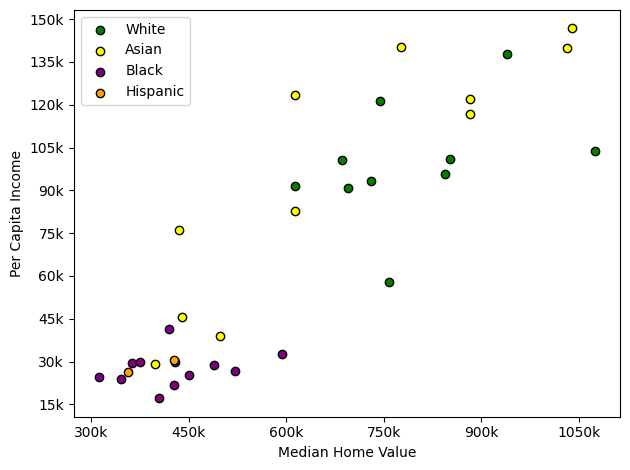

In [31]:
groups = [
    (white_econ, 'green', 'White'),
    (asian_econ, 'yellow', 'Asian'),
    (black_econ, 'purple', 'Black'),
    (hispanic_econ, 'orange', 'Hispanic')
]

# Plot each group's data
for df, color, label in groups:
    x = df["median_home_value"]
    y = df["per_capita_income"]
    plt.scatter(x, y, color=color, edgecolors='black', label=label)

plt.xlabel("Median Home Value")
plt.ylabel("Per Capita Income")

xticks = np.arange(300000, 1200000, 150000)
yticks = np.arange(15000, 165000, 15000)

plt.xticks(xticks, [f'{x//1000}k' for x in xticks])
plt.yticks(yticks, [f'{y//1000}k' for y in yticks])

plt.legend()
plt.tight_layout()
plt.show()

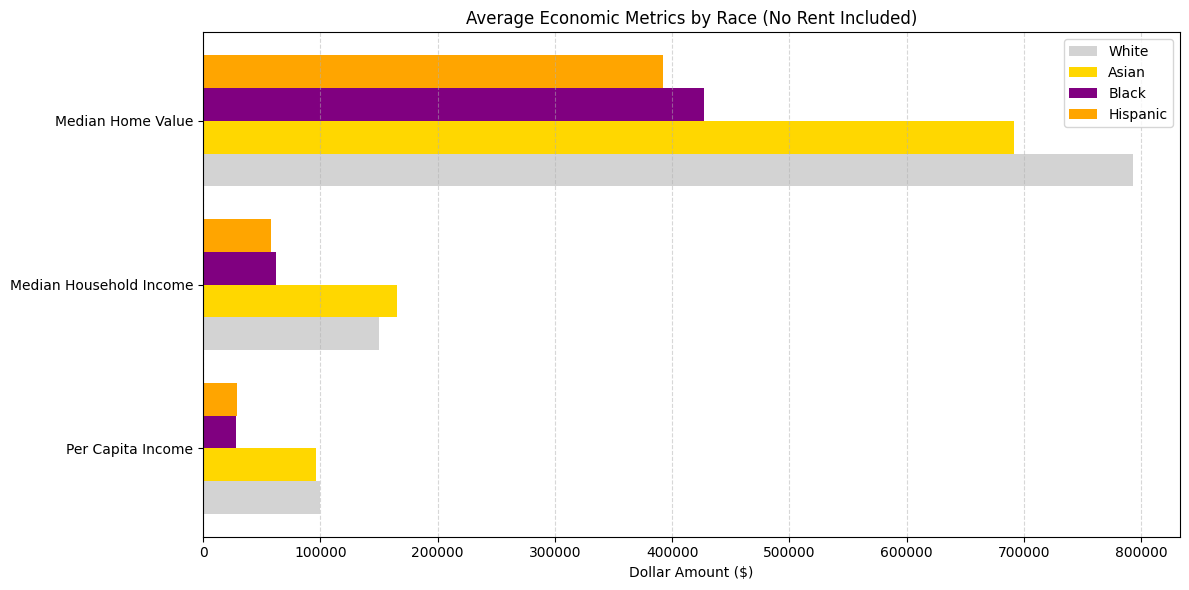

In [32]:
# Updated categories and X-axis positions
categories = ["Per Capita Income", "Median Household Income", "Median Home Value"]
x = np.arange(len(categories))
width = 0.2

# Remove Rent (index 1) from each group
white_vals = [averages["White"][0], averages["White"][2], averages["White"][3]]
asian_vals = [averages["Asian"][0], averages["Asian"][2], averages["Asian"][3]]
black_vals = [averages["Black"][0], averages["Black"][2], averages["Black"][3]]
hispanic_vals = [averages["Hispanic"][0], averages["Hispanic"][2], averages["Hispanic"][3]]

# Create the horizontal grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(x - 1.5*width, white_vals, height=width, label='White', color='lightgray')
ax.barh(x - 0.5*width, asian_vals, height=width, label='Asian', color='gold')
ax.barh(x + 0.5*width, black_vals, height=width, label='Black', color='purple')
ax.barh(x + 1.5*width, hispanic_vals, height=width, label='Hispanic', color='orange')

# Formatting
ax.set_xlabel("Dollar Amount ($)")
ax.set_title("Average Economic Metrics by Race (No Rent Included)")
ax.set_yticks(x)
ax.set_yticklabels(categories)
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [33]:
data_pop_percentages_edcu = pd.merge(
    data_pop_percentages,
    Data[[
        "tract", 
        "educational_attainment_25plus",
        "high_school_graduate_25plus",
        "male high school graduate 18-24", 
        "male some college no degree 18-24", 
        "male associate's degree 18-24", 
        "female high school graduate 18-24", 
        "female some college no degree 18-24", 
        "female associate's degree 18-24"
    ]],
    on="tract",
    how="left"
)

### What is education of the tract 

In [34]:
data_pop_percentages_edcu

,total_population,white_alone,black_alone,hispanic_latino,asian_alone,tract,highest_race_group,educational_attainment_25plus,high_school_graduate_25plus,male high school graduate 18-24,male some college no degree 18-24,male associate's degree 18-24,female high school graduate 18-24,female some college no degree 18-24,female associate's degree 18-24
0,2584,41.99,15.05,12.42,15.91,002300,white_alone,143,0,0,15,0,0,15,0
1,2901,60.81,5.10,26.09,10.44,002400,white_alone,120,1,44,38,0,10,21,0
2,2369,50.65,9.37,35.67,9.12,003500,white_alone,237,44,36,0,0,18,6,0
3,6137,12.12,20.65,17.99,42.48,004000,asian_alone,1084,75,58,322,0,19,116,0
4,4786,23.86,32.57,32.20,11.66,004200,black_alone,1039,150,0,177,80,14,0,0
5,3193,30.60,57.59,21.14,1.19,004300,black_alone,443,6,13,89,0,0,46,0
6,2691,16.09,64.14,34.15,0.00,004400,black_alone,707,23,52,0,0,87,30,0
7,5725,19.95,68.91,12.05,2.15,004500,black_alone,1217,30,91,193,0,164,0,22
8,5035,16.01,34.52,20.40,27.05,004800,black_alone,945,40,49,16,0,39,36,52
9,4807,15.96,49.03,18.02,12.50,004900,black_alone,578,107,86,93,0,54,152,18


In [35]:
data_pop_percentages_edcu["edu_percentage_25plus"] = (data_pop_percentages_edcu['educational_attainment_25plus']/data_pop_percentages_edcu['total_population']).multiply(100).round(2)
print(data_pop_percentages_edcu["edu_percentage_25plus"].mean())
data_pop_percentages_edcu

11.681428571428572


,total_population,white_alone,black_alone,hispanic_latino,asian_alone,tract,highest_race_group,educational_attainment_25plus,high_school_graduate_25plus,male high school graduate 18-24,male some college no degree 18-24,male associate's degree 18-24,female high school graduate 18-24,female some college no degree 18-24,female associate's degree 18-24,edu_percentage_25plus
0,2584,41.99,15.05,12.42,15.91,002300,white_alone,143,0,0,15,0,0,15,0,5.53
1,2901,60.81,5.10,26.09,10.44,002400,white_alone,120,1,44,38,0,10,21,0,4.14
2,2369,50.65,9.37,35.67,9.12,003500,white_alone,237,44,36,0,0,18,6,0,10.00
3,6137,12.12,20.65,17.99,42.48,004000,asian_alone,1084,75,58,322,0,19,116,0,17.66
4,4786,23.86,32.57,32.20,11.66,004200,black_alone,1039,150,0,177,80,14,0,0,21.71
5,3193,30.60,57.59,21.14,1.19,004300,black_alone,443,6,13,89,0,0,46,0,13.87
6,2691,16.09,64.14,34.15,0.00,004400,black_alone,707,23,52,0,0,87,30,0,26.27
7,5725,19.95,68.91,12.05,2.15,004500,black_alone,1217,30,91,193,0,164,0,22,21.26
8,5035,16.01,34.52,20.40,27.05,004800,black_alone,945,40,49,16,0,39,36,52,18.77
9,4807,15.96,49.03,18.02,12.50,004900,black_alone,578,107,86,93,0,54,152,18,12.02


11.68% of the population aged 25 and older have some college education, indicating a potential target audience for higher education marketing or degree completion programs.

### What percentage of people are eligible for college 

In [36]:
total_male_edu_18_24 = data_pop_percentages_edcu[["male high school graduate 18-24", "male some college no degree 18-24", "male associate's degree 18-24"]].sum()
print("Male Total:", total_male_edu_18_24.sum())
print(total_male_edu_18_24)
total_female_edu_18_24 = data_pop_percentages_edcu[["female high school graduate 18-24", "female some college no degree 18-24", "female associate's degree 18-24"]].sum()
print("Female Total:", total_female_edu_18_24.sum())
print(total_female_edu_18_24)
print("Total:", total_male_edu_18_24.sum()+total_female_edu_18_24.sum())

Male Total: 3640
male high school graduate 18-24      1323
male some college no degree 18-24    2189
male associate's degree 18-24         128
dtype: int64
Female Total: 2631
female high school graduate 18-24      1038
female some college no degree 18-24    1461
female associate's degree 18-24         132
dtype: int64
Total: 6271


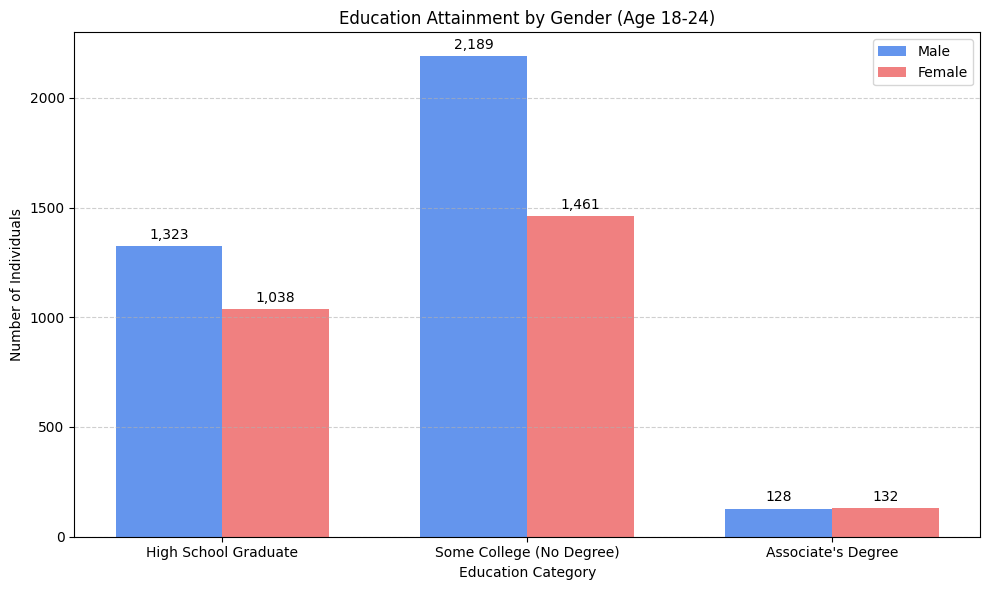

In [37]:
categories = [
    "High School Graduate",
    "Some College (No Degree)",
    "Associate's Degree"
]

# Values from your sums
male_values = total_male_edu_18_24.values
female_values = total_female_edu_18_24.values

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, male_values, width, label='Male', color='cornflowerblue')
bars2 = ax.bar(x + width/2, female_values, width, label='Female', color='lightcoral')

ax.set_xlabel('Education Category')
ax.set_ylabel('Number of Individuals')
ax.set_title('Education Attainment by Gender (Age 18-24)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Add labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [38]:
total_eligible_client = ((total_male_edu_18_24.sum() + total_female_edu_18_24.sum())/data_pop_percentages_edcu["total_population"].sum())*100

total_eligible_client = round(total_eligible_client, 2)
print("Total eligible client (%):", total_eligible_client)

Total eligible client (%): 4.13


Although only 4.13% of the population is eligible for college, this still amounts to approximately 6,271 individuals; about one-third of Kean University's current enrollment.
It's important to note that this number does not account for students who are already attending college.
In addition, there are around 2,361 high school students, which represents a substantially large potential future college-going population.

In [39]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 34
Data columns (total 40 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   total_population                                                  35 non-null     int64   
 1   white_alone                                                       35 non-null     int64   
 2   black_alone                                                       35 non-null     int64   
 3   hispanic_latino                                                   35 non-null     int64   
 4   median_household_income                                           35 non-null     float64 
 5   per_capita_income                                                 35 non-null     float64 
 6   median_rent                                                       35 non-null     float64 
 7   median_home_value                

In [40]:
data_tax = Data[["median_home_value", "per_capita_income"]].copy()
data_tax["housing_tax"] = Data["median_home_value"].multiply(0.0212)    # average property tax
data_tax["income_tax"] = Data["per_capita_income"].multiply(0.2)        # average income tax
data_tax

,median_home_value,per_capita_income,housing_tax,income_tax
0,852100.0,100817.0,18064.52,20163.4
1,939000.0,137890.0,19906.80,27578.0
2,729800.0,93337.0,15471.76,18667.4
3,397500.0,29084.0,8427.00,5816.8
4,520500.0,26638.0,11034.60,5327.6
5,593100.0,32584.0,12573.72,6516.8
6,427600.0,21649.0,9065.12,4329.8
7,451000.0,25365.0,9561.20,5073.0
8,419800.0,41470.0,8899.76,8294.0
9,489100.0,28858.0,10368.92,5771.6


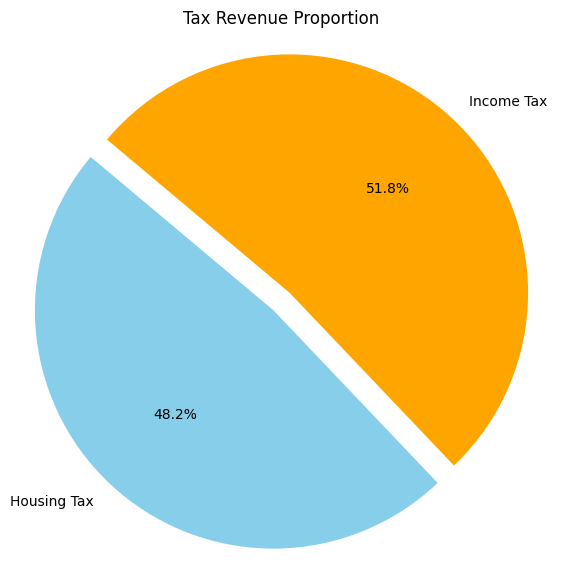

In [46]:
labels = ['Housing Tax', 'Income Tax']
sizes = [data_tax.housing_tax.sum().round(2), data_tax.income_tax.sum().round(2)]
colors = ['skyblue', 'orange']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.05, 0.05))
plt.title('Tax Revenue Proportion')
plt.axis('equal')
plt.show()

In [42]:
print("Housing tax:", data_tax.housing_tax.sum().round(2))
print("Income tax:", data_tax.income_tax.sum().round(2))
print("Total Tax:", data_tax.housing_tax.sum().round(2)+data_tax.income_tax.sum().round(2))

Housing tax: 454938.75
Income tax: 488630.0
Total Tax: 943568.75


The one million in tax revenue isn't bad, but the overall funding allocated to education still isn't ideal. This isn't all the available tax data, but income and property values should still play a significant role.

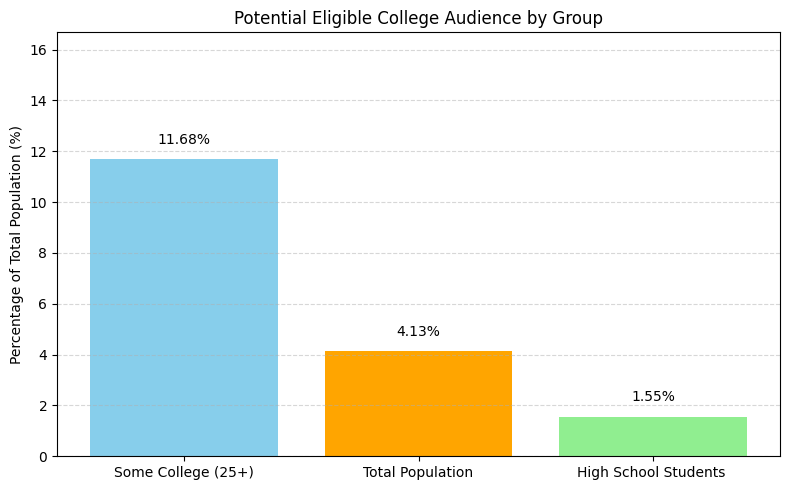

In [43]:
labels = [
    "Some College (25+)",
    "Total Population",
    "High School Students "
]

total_population = data_pop_percentages_edcu["total_population"].sum()  # total population as scalar
high_school_percent = (2361 / total_population) * 100

total_eligible_client = 4.13  # or calculate this if you have the value dynamically
total_eligible_client = round(total_eligible_client, 2)

percentages = [
    data_pop_percentages_edcu["edu_percentage_25plus"].mean(),
    total_eligible_client,
    high_school_percent
]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, percentages, color=['skyblue', 'orange', 'lightgreen'])

plt.title("Potential Eligible College Audience by Group")
plt.ylabel("Percentage of Total Population (%)")
plt.ylim(0, max(percentages) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Label bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f"{yval:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=44dde2ca-1bbb-4b07-8a39-7921eac92bbd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>